In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from datetime import datetime as dt
import datetime

%matplotlib inline


In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [190706, 190713, 190720]
turnstiles_df = get_data_parse_dt(week_nums)

In [3]:
turnstiles_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2019-06-29 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,00:00:00,REGULAR,7116734,2410183
1,2019-06-29 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,08:00:00,REGULAR,7116770,2410218
2,2019-06-29 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,12:00:00,REGULAR,7116856,2410288
3,2019-06-29 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,16:00:00,REGULAR,7117076,2410346
4,2019-06-29 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,20:00:00,REGULAR,7117340,2410387


In [4]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [5]:
turnstiles_df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
turnstiles_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2019-06-29 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,00:00:00,REGULAR,7116734,2410183
1,2019-06-29 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,08:00:00,REGULAR,7116770,2410218
2,2019-06-29 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,12:00:00,REGULAR,7116856,2410288
3,2019-06-29 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,16:00:00,REGULAR,7117076,2410346
4,2019-06-29 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,20:00:00,REGULAR,7117340,2410387


In [7]:
turnstiles_df.tail()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
209001,2019-07-19 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/19/2019,05:00:00,REGULAR,5554,383
209002,2019-07-19 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/19/2019,09:00:00,REGULAR,5554,383
209003,2019-07-19 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/19/2019,13:00:00,REGULAR,5554,383
209004,2019-07-19 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/19/2019,17:00:00,REGULAR,5554,383
209005,2019-07-19 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/19/2019,21:00:00,REGULAR,5554,383


In [8]:
# Three weeks of Data
turnstiles_df.DATE.value_counts().sort_index()

06/29/2019    29239
06/30/2019    29130
07/01/2019    29306
07/02/2019    30114
07/03/2019    29965
07/04/2019    30989
07/05/2019    30795
07/06/2019    29249
07/07/2019    29272
07/08/2019    30826
07/09/2019    29262
07/10/2019    29774
07/11/2019    29399
07/12/2019    31015
07/13/2019    29252
07/14/2019    29394
07/15/2019    30123
07/16/2019    30236
07/17/2019    30548
07/18/2019    29414
07/19/2019    30039
Name: DATE, dtype: int64

In [9]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2019-06-29 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,00:00:00,REGULAR,7116734,2410183
1,2019-06-29 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,08:00:00,REGULAR,7116770,2410218
2,2019-06-29 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,12:00:00,REGULAR,7116856,2410288
3,2019-06-29 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,16:00:00,REGULAR,7117076,2410346
4,2019-06-29 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,20:00:00,REGULAR,7117340,2410387


In [10]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
# i.e. check for duplicates

(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
148678,N045,R187,01-00-01,81 ST-MUSEUM,2019-07-09 09:00:00,2
148945,N045,R187,01-06-00,81 ST-MUSEUM,2019-07-09 09:00:00,2
149079,N045,R187,01-06-01,81 ST-MUSEUM,2019-07-09 09:00:00,2
478594,R229,R143,01-00-01,28 ST,2019-06-29 09:00:00,2
148812,N045,R187,01-00-02,81 ST-MUSEUM,2019-07-09 09:00:00,2


In [11]:
turnstiles_df.DESC.value_counts()

REGULAR       624300
RECOVR AUD      3041
Name: DESC, dtype: int64

In [12]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [13]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-06-29 00:00:00,1
418225,R138,R293,00-03-03,34 ST-PENN STA,2019-07-12 18:15:28,1
418218,R138,R293,00-03-03,34 ST-PENN STA,2019-07-12 18:06:02,1
418219,R138,R293,00-03-03,34 ST-PENN STA,2019-07-12 18:07:22,1
418220,R138,R293,00-03-03,34 ST-PENN STA,2019-07-12 18:08:43,1


In [14]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [15]:
turnstiles_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES
209005,2019-07-19 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/19/2019,21:00:00,5554
209004,2019-07-19 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/19/2019,17:00:00,5554
209003,2019-07-19 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/19/2019,13:00:00,5554
209002,2019-07-19 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/19/2019,09:00:00,5554
209001,2019-07-19 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/19/2019,05:00:00,5554


In [16]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [17]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/29/2019,7117340
1,A002,R051,02-00-00,59 ST,06/30/2019,7118006
2,A002,R051,02-00-00,59 ST,07/01/2019,7119397
3,A002,R051,02-00-00,59 ST,07/02/2019,7120957
4,A002,R051,02-00-00,59 ST,07/03/2019,7122457


In [18]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/home/luke/miniconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [19]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,06/29/2019,7117340,NaN,NaN
1,A002,R051,02-00-00,59 ST,06/30/2019,7118006,06/29/2019,7117340.0
2,A002,R051,02-00-00,59 ST,07/01/2019,7119397,06/30/2019,7118006.0
3,A002,R051,02-00-00,59 ST,07/02/2019,7120957,07/01/2019,7119397.0
4,A002,R051,02-00-00,59 ST,07/03/2019,7122457,07/02/2019,7120957.0


In [20]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
102546,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/15/2019,5554,07/14/2019,5554.0
102547,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/16/2019,5554,07/15/2019,5554.0
102548,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/17/2019,5554,07/16/2019,5554.0
102549,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/18/2019,5554,07/17/2019,5554.0
102550,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/19/2019,5554,07/18/2019,5554.0


In [21]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [22]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,06/30/2019,7118006,06/29/2019,7117340.0
2,A002,R051,02-00-00,59 ST,07/01/2019,7119397,06/30/2019,7118006.0
3,A002,R051,02-00-00,59 ST,07/02/2019,7120957,07/01/2019,7119397.0
4,A002,R051,02-00-00,59 ST,07/03/2019,7122457,07/02/2019,7120957.0
5,A002,R051,02-00-00,59 ST,07/04/2019,7123145,07/03/2019,7122457.0


In [23]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
245,A002,R051,02-06-00,59 ST,07/13/2019,524,07/12/2019,2.582490e+05
1618,A025,R023,01-03-01,34 ST-HERALD SQ,06/30/2019,1238245456,06/29/2019,1.238248e+09
1619,A025,R023,01-03-01,34 ST-HERALD SQ,07/01/2019,1238241883,06/30/2019,1.238245e+09
1620,A025,R023,01-03-01,34 ST-HERALD SQ,07/02/2019,1238238043,07/01/2019,1.238242e+09
1621,A025,R023,01-03-01,34 ST-HERALD SQ,07/03/2019,1238234177,07/02/2019,1.238238e+09


In [24]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A025") & 
(turnstiles_df["UNIT"] == "R023") & 
(turnstiles_df["SCP"] == "01-03-01") & 
(turnstiles_df["STATION"] == "34 ST-HERALD SQ") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 2, 23).date()))
turnstiles_df[mask].head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES


In [25]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A002  R051  02-06-00  59 ST               1
A025  R023  01-03-01  34 ST-HERALD SQ    20
A043  R462  00-03-03  CANAL ST            1
A049  R088  02-05-00  CORTLANDT ST       14
A066  R118  00-00-00  CANAL ST           20
                                         ..
R534  R055  01-05-00  FLUSHING-MAIN       1
R621  R060  00-03-01  EASTN PKWY-MUSM     1
R622  R123  00-00-00  FRANKLIN AV        20
R646  R110  01-00-01  FLATBUSH AV-B.C    20
R730  R431  00-00-04  EASTCHSTER/DYRE    19
Length: 92, dtype: int64

In [26]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

724 3557590.0
14 2997591.0
5327469 4320256.0
4320262 2920966.0
190 3407197.0
1201 4720992.0
635 7542543.0
458765 6627951.0
524434 2338090.0
939 1372039.0
2162757 33622254.0
4 5705107.0
163997066 972453993.0
1856 36992819.0
78259899 1442544817.0
1862330299 7277107.0
33753968 50516711.0
50474180 33772903.0
1594420961 140471363.0
634 1108422109.0
165 18340250.0
98096618 670717802.0
2046764827 8810158.0


In [27]:
turnstiles_daily.max()

C/A                    TRAM2
UNIT                    R572
SCP                 05-06-01
STATION            ZEREGA AV
DATE              07/19/2019
ENTRIES           2129221621
PREV_DATE         07/18/2019
PREV_ENTRIES     2.12922e+09
DAILY_ENTRIES         798064
dtype: object

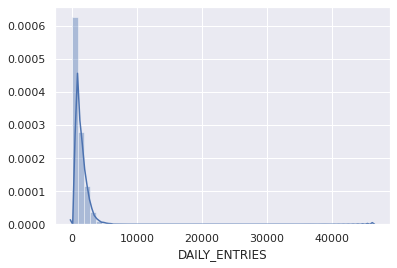

In [28]:
sns.distplot(turnstiles_daily['DAILY_ENTRIES']
             [turnstiles_daily['DAILY_ENTRIES'] < 50000])

In [29]:
# first get daily entries by station
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,06/30/2019,11023.0
1,1 AV,07/01/2019,17168.0
2,1 AV,07/02/2019,17088.0
3,1 AV,07/03/2019,17532.0
4,1 AV,07/04/2019,9425.0


In [30]:
# then get top 10 stations by daily volume 
# (sum across all days is a reasonable way to define this)
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

61      34 ST-PENN STA
46               23 ST
232    GRD CNTRL-42 ST
352     TIMES SQ-42 ST
59     34 ST-HERALD SQ
68     42 ST-PORT AUTH
14      14 ST-UNION SQ
86      59 ST COLUMBUS
225          FULTON ST
216      FLUSHING-MAIN
Name: STATION, dtype: object

In [31]:
# next create a new df that filters the stations daily data down
# to the top 10 stations
stations_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)]

In [32]:
stations_daily_top10

,STATION,DATE,DAILY_ENTRIES
280,14 ST-UNION SQ,06/30/2019,83043.0
281,14 ST-UNION SQ,07/01/2019,102787.0
282,14 ST-UNION SQ,07/02/2019,96059.0
283,14 ST-UNION SQ,07/03/2019,98350.0
284,14 ST-UNION SQ,07/04/2019,46425.0
...,...,...,...
7052,TIMES SQ-42 ST,07/15/2019,97194.0
7053,TIMES SQ-42 ST,07/16/2019,106675.0
7054,TIMES SQ-42 ST,07/17/2019,111758.0
7055,TIMES SQ-42 ST,07/18/2019,104762.0


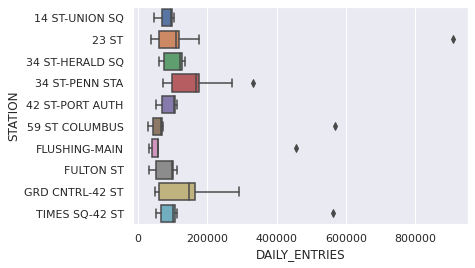

In [33]:
# use seaborn to create a boxplot by station
# with countermax set to 10000000
sns.boxplot('DAILY_ENTRIES', 'STATION', data=stations_daily_top10)

In [34]:
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=200000)

524 258249.0
724 3557590.0
77 644565.0
14 2997591.0
5327469 4320256.0
2997595 2487626.0
4320262 2920966.0
190 3407197.0
1201 4720992.0
480 215243.0
635 7542543.0
458765 6627951.0
524434 2338090.0
809 259712.0
939 1372039.0
458752 0.0
2162757 33622254.0
458837 1256901.0
4 5705107.0
163997066 972453993.0
1856 36992819.0
78259899 1442544817.0
1862330299 7277107.0
33753968 50516711.0
50474180 33772903.0
1594420961 140471363.0
634 1108422109.0
165 18340250.0
98096618 670717802.0
2046764827 8810158.0
151 496945.0
3 399490.0


In [35]:
# first get daily entries by station
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,06/30/2019,11023.0
1,1 AV,07/01/2019,17168.0
2,1 AV,07/02/2019,17088.0
3,1 AV,07/03/2019,17532.0
4,1 AV,07/04/2019,9425.0


In [36]:
# then get top 10 stations by daily volume 
# (sum across all days is a reasonable way to define this)
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

61      34 ST-PENN STA
232    GRD CNTRL-42 ST
59     34 ST-HERALD SQ
46               23 ST
68     42 ST-PORT AUTH
352     TIMES SQ-42 ST
14      14 ST-UNION SQ
225          FULTON ST
110              86 ST
172           CANAL ST
Name: STATION, dtype: object

In [37]:
# next create a new df that filters the stations daily data down
# to the top 10 stations
stations_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)]

In [38]:
stations_daily_top10

,STATION,DATE,DAILY_ENTRIES
280,14 ST-UNION SQ,06/30/2019,83043.0
281,14 ST-UNION SQ,07/01/2019,102787.0
282,14 ST-UNION SQ,07/02/2019,96059.0
283,14 ST-UNION SQ,07/03/2019,98350.0
284,14 ST-UNION SQ,07/04/2019,46425.0
...,...,...,...
7052,TIMES SQ-42 ST,07/15/2019,97194.0
7053,TIMES SQ-42 ST,07/16/2019,106675.0
7054,TIMES SQ-42 ST,07/17/2019,111758.0
7055,TIMES SQ-42 ST,07/18/2019,104762.0


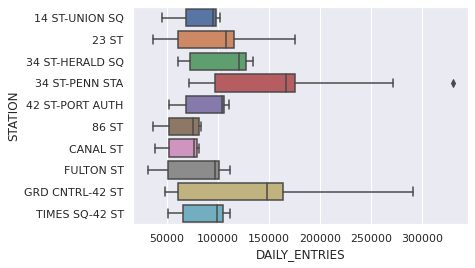

In [39]:
# use seaborn to create a boxplot by station
# with countermax set to 10000000
sns.boxplot('DAILY_ENTRIES', 'STATION', data=stations_daily_top10)

In [40]:
turnstiles_daily[turnstiles_daily['STATION']=='34 ST-PENN STA'].groupby('DATE').sum()

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
DATE,,,
06/30/2019,3832964953,3.840409e+09,100708.0
07/01/2019,3833133910,3.832965e+09,172011.0
07/02/2019,3833295796,3.833134e+09,164620.0
07/03/2019,3833450998,3.833296e+09,157966.0
07/04/2019,3833523541,3.833451e+09,73673.0
07/05/2019,3833629120,3.833524e+09,107241.0
07/06/2019,3833703754,3.833629e+09,75856.0
07/07/2019,3833778569,3.833704e+09,86677.0
07/08/2019,3833946808,3.833779e+09,171515.0


Two key things we should notice from these quick EDA steps:

- Using our knowledge of NYC, it **doesn't seem right that these are the top 10 stations**. Some are reasonable like grand central and times square, but is 23rd street really that popular? A next step here would be to dig into turnstiles in "23 ST" (hint: check the line names for different instances of 23 ST, is it really one station?) 


- There's still a **clear outlier in daily traffic for Canal St**, we should be able to figure out what's causing this by digging into it. Maybe our cleaning process is not quite enough yet (1 million is too large a cutoff!)

In [42]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES
40,2019-07-19 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/19/2019,20:00:00,7140063
39,2019-07-19 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/19/2019,16:00:00,7139426
38,2019-07-19 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/19/2019,12:00:00,7139079
37,2019-07-19 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/19/2019,08:00:00,7138925
36,2019-07-19 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/19/2019,04:00:00,7138874


In [43]:
turnstiles_df[turnstiles_df['STATION']=='23 ST']['LINENAME'].unique()

array(['6', '1', 'FM', 'CE', 'NRW'], dtype=object)

In [44]:
turnstiles_df[turnstiles_df['STATION']=='14 ST-UNION SQ']['LINENAME'].unique()

array(['456LNQRW', 'LNQR456W'], dtype=object)

In [45]:
turnstiles_df[turnstiles_df['STATION']=='TIMES SQ-42 ST']['LINENAME'].unique()

array(['1237ACENQRSW', '1237ACENQRS', 'ACENQRS1237W'], dtype=object)

### From Field Description on mta website

LINENAME 
    - Represents all train lines that can be boarded at this station.
    - Normally lines are represented by one character.  
    - LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.

### From Wikipedia

#### 23rd Street station (IND Sixth Avenue Line)
23rd Street is a local station on the IND Sixth Avenue Line of the New York City Subway. Located at the intersection of 23rd Street and Sixth Avenue (Avenue of the Americas) in Manhattan. It is served by the F train at all times, the M train at all times except late nights, and by the <F> train during rush hours in the peak direction. This station and 14th Street are the only two local stations on the Sixth Avenue Line.

#### 23rd Street station (BMT Broadway Line)
23rd Street is a local station on the BMT Broadway Line of the New York City Subway. Located at the intersection of 23rd Street, Broadway, and Fifth Avenue in Manhattan, it is served by the R train at all times except late nights, the W train on weekdays, the N train during late nights and weekends and the Q train during late nights.